In [3]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.python.keras.utils.np_utils import to_categorical
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [4]:
digits_train = pd.read_csv("data/train.csv")


#input data for awnsering opdracht
digits_test = pd.read_csv("data/test.csv")
test_data_in = digits_test.to_numpy()
test_data = np.reshape(test_data_in, (test_data_in.shape[0], 28, 28))
test_data = np.expand_dims(test_data, axis=3)

#split traindata for train and validation data and labels
msk = np.random.rand(len(digits_train)) < 0.8 # maak een random mask voor het splitsen tussen train data en verification data.
#msk is een bool list die random zijn.
train = digits_train[msk]
val = digits_train[~msk]

#to numpy
train_data_in = train.to_numpy()
val_data_in = val.to_numpy()


# get labels
train_labels = train_data_in[:, 0]  # get first colom from the training data
val_labels = val_data_in[:, 0]  # get first colom from the training data
train_data_without_label = train_data_in[:, 1:]  # remove first colom (labels) from the training data
val_data_without_label = val_data_in[:, 1:]  # remove first colom (labels) from the training data


# make a 3d array (size, 28, 28)
train_data = np.reshape(train_data_without_label, (train_data_without_label.shape[0], 28, 28))
val_data = np.reshape(val_data_without_label, (val_data_without_label.shape[0], 28, 28))

# make proper dimensions
train_data = np.expand_dims(train_data, axis=3)
#test_data = np.expand_dims(test_data, axis=3)
val_data = np.expand_dims(val_data, axis=3)

#print(train_labels.shape)
#print(train_data.shape)
#print(val_labels.shape)
#print(val_data.shape)
#print(test_data.shape)

In [14]:
# variables for model
num_filters = 2
filter_size = (3, 3)
pool_size = (2, 2) # Deze pool_size is klein omdat de dataset klein (28x28) is. wanneer deze hoger is zullen er meer fouten in komen. (bijvoorbeeld bij een open 0 en een 6)

model = Sequential([])

model.add(Conv2D(10, (3, 3), padding='same', activation='relu', input_shape=train_data.shape[1:]))
model.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model training:

In [15]:
h = model.fit(train_data, train_labels, epochs=16, validation_data=(val_data, val_labels))

Epoch 1/16
1050/1050 [==============================] - 5s 4ms/step - loss: 0.5696 - accuracy: 0.9340 - val_loss: 0.1489 - val_accuracy: 0.9595
Epoch 2/16
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0755 - accuracy: 0.9779 - val_loss: 0.1341 - val_accuracy: 0.9629
Epoch 3/16
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0531 - accuracy: 0.9843 - val_loss: 0.1040 - val_accuracy: 0.9704
Epoch 4/16
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.1137 - val_accuracy: 0.9743
Epoch 5/16
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0380 - accuracy: 0.9886 - val_loss: 0.1071 - val_accuracy: 0.9725
Epoch 6/16
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.1358 - val_accuracy: 0.9723
Epoch 7/16
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.1436 - val_accuracy:

In [16]:
test_loss, test_acc = model.evaluate(train_data,  train_labels, verbose=2)
print("accuracy = {}".format(test_acc))

1050/1050 - 2s - loss: 0.0111 - accuracy: 0.9968
accuracy = 0.9967550039291382


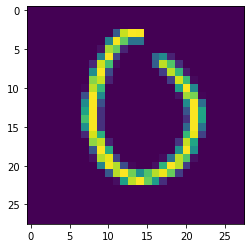

[[9.9982041e-01 6.4533082e-23 1.1602065e-10 3.3764317e-15 1.3751096e-17
  7.6373331e-11 1.7862045e-04 8.9709564e-15 3.3750160e-07 6.0939692e-07]]
0


In [8]:
img = 110

# plot test image
plt.imshow(test_data[img, :, :, 0])
plt.show()

#predict test image and print the answer
x = np.expand_dims(test_data[img], axis=0)
prediction = model.predict(x)
print(prediction)
print(np.argmax(prediction))

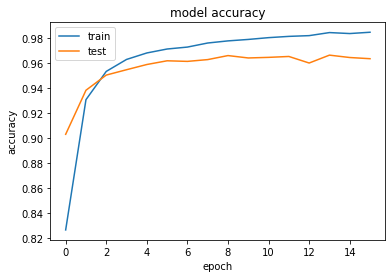

In [9]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Kaggle challenge test dataset

In [11]:
#out = list()
file = open("out.txt", "w")

for i in range(test_data.shape[0]):
    file.write("({},{})\n".format(i, np.argmax(model.predict(np.expand_dims(test_data[i], axis=0)))))
    #out.append((i, np.argmax(model.predict(np.expand_dims(test_data[i], axis=0)))))

file.close()